Setting up environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
# Natural Language Toolkit
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud

Read in NY Times data and clean

In [3]:
def load_data():
    """Load the data from the New York Times GitHub repository."""
    df = pd.read_csv("./data/NYT_data.csv")

    return df

In [4]:
nytimes = load_data()
nytimes.head()

,Unnamed: 0,Headlines,Lead paragraph,abstract,places,people,topics,Is gentrification a keyword,gentrification in headline or lead para
0,0,"As Austin’s SoCo District Grows, Is It Losing ...","AUSTIN, Texas — In the early half of the 20th ...",Streets like South Congress Avenue are crucial...,['Austin (Tex)'],NaN,"['Shopping and Retail', 'Gentrification', 'Are...",True,False
1,1,Why Harlem Is Getting a Truck Depot Instead of...,The lot on West 145th Street in Manhattan was ...,A developer wanted to build residential towers...,"['Harlem (Manhattan, NY)']","['Teitelbaum, Bruce J', 'Jordan, Kristin Richa...","['Trucks and Trucking', 'Real Estate and Housi...",True,False
2,2,Must We Gentrify the Rest Stop?,"Five years ago, the New York State Thruway Aut...","McDonald’s is gone, and the Manhattanization o...","['Dewey, Thomas E, Thruway', 'New York State']",NaN,"['Roads and Traffic', 'Gentrification', 'Fast ...",True,False
3,3,Remaking the River That Remade L.A.,"Over the past century it has been channeled, s...","Over the past century it has been channeled, s...","['Los Angeles River (Calif)', 'Los Angeles (Ca...",NaN,"['Area Planning and Renewal', 'Gentrification'...",True,False
4,4,"A Legendary World Builder on Multiverses, Revo...",N.K. Jemisin is a fantasy and science-fiction ...,How the fantasy and science-fiction writer N.K...,NaN,"['Jemisin, N K']","['audio-neutral-informative', 'Writing and Wri...",True,False


In [5]:
places = nytimes["places"].dropna(inplace=True)
places = (
    nytimes["places"]
    .str.replace(r"\[|\]|'", "")
)
places.head()


/var/folders/8k/mxvfr1w535z_3bph05j_br080000gn/T/ipykernel_26599/843558081.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  nytimes["places"]


0                                         Austin (Tex)
1                               Harlem (Manhattan, NY)
2             Dewey, Thomas E, Thruway, New York State
3    Los Angeles River (Calif), Los Angeles (Calif)...
4                                                  NaN
Name: places, dtype: object

In [6]:
locations = places.value_counts()
locations = locations[locations > 10]
locations


New York City                     215
Brooklyn (NYC)                     51
HARLEM (NYC)                       38
Los Angeles (Calif)                20
San Francisco (Calif)              16
Bronx (NYC)                        16
Berlin (Germany)                   16
Manhattan (NYC)                    15
London (England)                   14
Washington (DC)                    14
Brooklyn (NYC), New York City      14
Harlem (Manhattan, NY)             13
New York City, HARLEM (NYC)        12
Chicago (Ill)                      11
New York City, Manhattan (NYC)     11
Name: places, dtype: int64

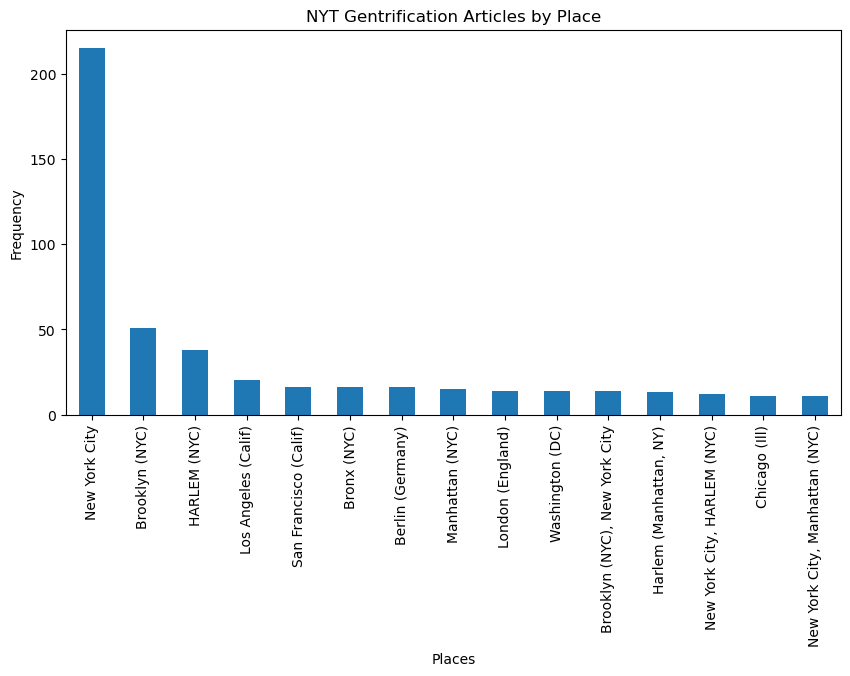

In [8]:
# Create histogram of the places where gentrification articles are most common
(
  locations.plot(
      kind="bar",
      figsize=(10, 5),
      xlabel="Places",
      ylabel="Frequency",
      title="NYT Gentrification Articles by Place",
    )
);

Applying Natural Language Processing Tools

In [7]:
nytimes["abstract"].head()

0    Streets like South Congress Avenue are crucial...
1    A developer wanted to build residential towers...
2    McDonald’s is gone, and the Manhattanization o...
3    Over the past century it has been channeled, s...
4    How the fantasy and science-fiction writer N.K...
Name: abstract, dtype: object

In [8]:
nytimes_abstracts = nytimes["abstract"].astype(str)
# nytimes_abstracts = ' '.join(nytimes_abstracts["abstract"])
nytimes_abstracts = ' '.join(nytimes_abstracts)


In [10]:
#tokenize text by words
words = word_tokenize(nytimes_abstracts)

#check the number of words
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 86373


In [11]:
#find the frequency of words
fdist = FreqDist(words)

#print the 10 most common words
fdist.most_common(10)

[(',', 4317),
 ('the', 3579),
 ('.', 2951),
 ('of', 2570),
 ('and', 2125),
 ('a', 1869),
 ('in', 1665),
 ('to', 1568),
 ('is', 767),
 ('on', 670)]

In [12]:
#create an empty list to store words
words_no_punc = []

#iterate through the words list to remove punctuations
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 71990


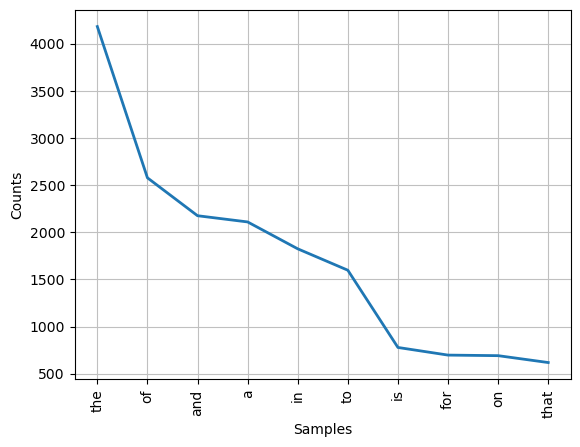

In [13]:
#find the frequency of words
fdist = FreqDist(words_no_punc)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

In [14]:
#Download and import list of stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

#list of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alfonsomeraz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 42643


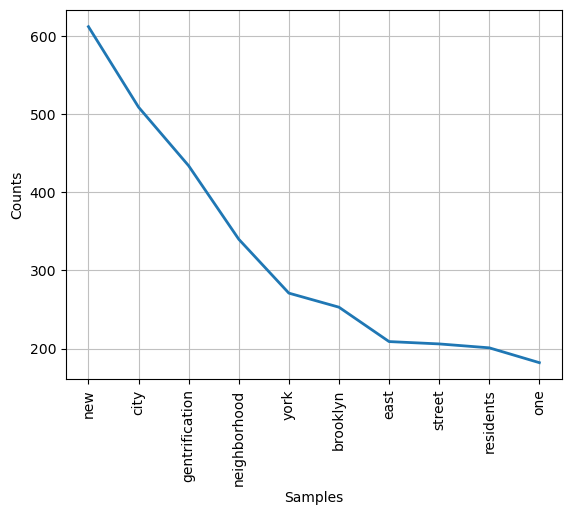

In [16]:
#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

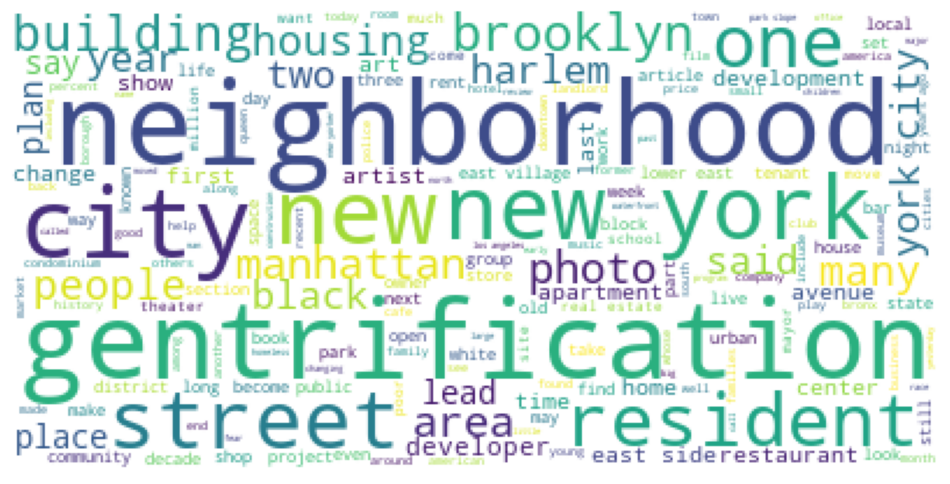

In [17]:
#Convert word list to a single string
clean_words_string = " ".join(clean_words)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()